<a href="https://colab.research.google.com/github/jonkar77/volatility_index-/blob/main/volatility_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import pandas as pd
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
pyo.init_notebook_mode(connected=True)
import time
import matplotlib.pyplot as plt
pd.options.plotting.backend = 'plotly'

In [ ]:
stock_symbol = "^NSEI"
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2024, 4, 27)

df = yf.download(stock_symbol, start=start_date, end=end_date, interval='1d')
df.index = pd.to_datetime(df.index)
df['Weekday'] = df.index.day_name()
# monthly_data = df.resample('M').agg({'Open': 'first', 'Close': 'last'})
data = pd.DataFrame({'Day': df.Weekday,  'Open': df.Open, 'Close': df.Close })
print()
print(df.iloc[::-1].head(12))



[*********************100%%**********************]  1 of 1 completed


                    Open          High           Low         Close  \
Date                                                                 
2024-04-26  22620.400391  22620.400391  22385.550781  22419.949219   
2024-04-25  22316.900391  22625.949219  22305.250000  22570.349609   
2024-04-24  22421.550781  22476.449219  22384.000000  22402.400391   
2024-04-23  22447.050781  22447.550781  22349.449219  22368.000000   
2024-04-22  22336.900391  22375.650391  22198.150391  22336.400391   
2024-04-19  21861.500000  22179.550781  21777.650391  22147.000000   
2024-04-18  22212.349609  22326.500000  21961.699219  21995.849609   
2024-04-16  22125.300781  22213.750000  22079.449219  22147.900391   
2024-04-15  22339.050781  22427.449219  22259.550781  22272.500000   
2024-04-12  22677.400391  22726.449219  22503.750000  22519.400391   
2024-04-10  22720.250000  22775.699219  22673.699219  22753.800781   
2024-04-09  22765.099609  22768.400391  22612.250000  22642.750000   

               Adj

In [ ]:
# Initialize an empty list to store the differences
differences = []
perc=[]
# Iterate over the data and calculate the differences
for index, row in df.iterrows():
    high = row['High']
    close=row['Close']
    open = row['Open']
    difference = (close-open)
    if difference>0 :
      per= difference/close * 100
    else:
      per= difference/open * 100
    perc.append(per)
    differences.append(difference)


data=pd.DataFrame({'Day': df.Weekday,  'Open': df.Open, 'Close': df.Close, 'Diff': differences, 'Percentage': perc})

print()
thursdays = data[data['Day'] == 'Thursday']
# print(thursdays)

# Apply statistical methods
statistics = data['Percentage'].describe()
stat=thursdays.describe();

# print(data)
print(statistics)
print(stat)


count    571.000000
mean      -0.032566
std        0.680508
min       -2.979048
25%       -0.434280
50%        0.004386
75%        0.377261
max        2.415793
Name: Percentage, dtype: float64
               Open         Close        Diff  Percentage
count    116.000000    116.000000  116.000000  116.000000
mean   18640.693940  18618.097850  -22.596090   -0.130715
std     1802.887061   1821.580757  123.326525    0.680436
min    15451.549805  15360.599609 -471.650391   -2.979048
25%    17453.099609  17446.712402  -91.011719   -0.486996
50%    18098.349609  18117.599609  -21.549805   -0.121680
75%    19622.837891  19633.499512   59.312012    0.322999
max    22592.099609  22570.349609  253.449219    1.300211


20


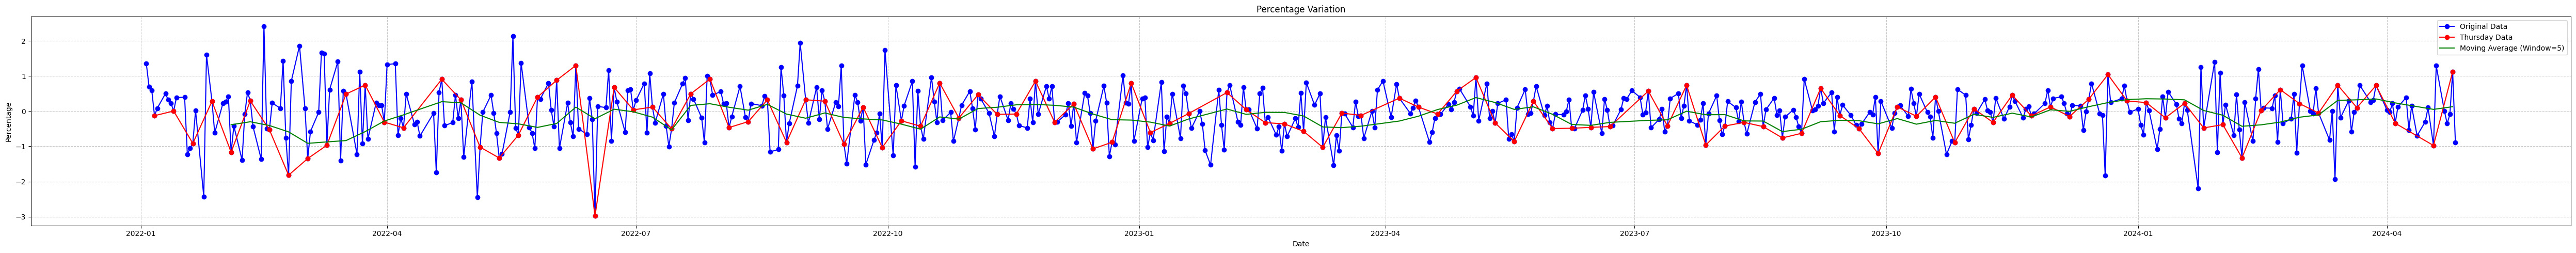

In [ ]:

# Assuming 'data' is your DataFrame containing the time series data
# Ensure the 'Date' column is set as the index and 'Percentage' and 'Day' columns exist

# Extract Thursday data
thursday_data = data[data['Day'] == 'Thursday']

# Calculate moving average with a window size of 5 (you can adjust this as needed)
moving_avg = thursday_data['Percentage'].rolling(window=5).mean()

# Plot all data in blue
plt.figure(figsize=(50, 5))
plt.plot(data.index, data['Percentage'], color='blue', marker='o', linestyle='-', label='Original Data')

# Plot Thursday data in red
plt.plot(thursday_data.index, thursday_data['Percentage'], color='red', marker='o', linestyle='-', label='Thursday Data')

# Plot moving average in green
plt.plot(thursday_data.index, moving_avg, color='green', linestyle='-', label='Moving Average (Window=5)')

# Count the number of data points where Percentage > 0.5
cnt = (thursday_data['Percentage'] > 0.5).sum()
print(cnt)

plt.title('Percentage Variation')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

thrusday > 0.5% change
2017: 12/51
2018: 17/47
2019:22/50
2020: 26/51
2021: 23/49
2022: 25/51
2023: 16/49

In [ ]:
stock_symbol = "^INDIAVIX"
start_date = datetime.datetime(2023, 6, 1)
end_date = datetime.datetime(2024, 4, 20)

df = yf.download(stock_symbol, start=start_date, end=end_date, interval='1d')
df.index = pd.to_datetime(df.index)
df['Weekday'] = df.index.day_name()
# monthly_data = df.resample('M').agg({'Open': 'first', 'Close': 'last'})
data = pd.DataFrame({'Day': df.Weekday,  'Open': df.Open, 'Close': df.Close })
print()
print(df.head(12))

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^INDIAVIX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Weekday]
Index: []
